In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# Load data form URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)
churn_df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
129,24.0,46.0,12.0,43.0,2.0,6.0,0.0,1.0,1.0,12.05,...,1.0,0.0,1.0,1.0,1.0,2.489,3.876,3.761,4.0,0.0
90,25.0,29.0,9.0,55.0,4.0,1.0,0.0,0.0,0.0,5.25,...,0.0,0.0,0.0,0.0,1.0,1.658,3.209,4.007,1.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
103,44.0,45.0,19.0,88.0,1.0,21.0,0.0,1.0,0.0,11.90,...,0.0,0.0,1.0,1.0,0.0,2.477,3.229,4.477,3.0,0.0


In [13]:
# params are assumed
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'churn']]
# to ensure churn data is an integer
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1


In [14]:
# y is the target: churn
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip','callcard']])
y = np.asarray(churn_df['churn'])

# normalize using StandardScalar
X_norm = StandardScaler().fit(X).transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [ ]:
# buidling the logistic regression classifier model
LR = LogisticRegression().fit(X_train, y_train)
# fitting or training gives us a model that has now learnt from trainnig data

# predict churn parameter for the test dataset
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

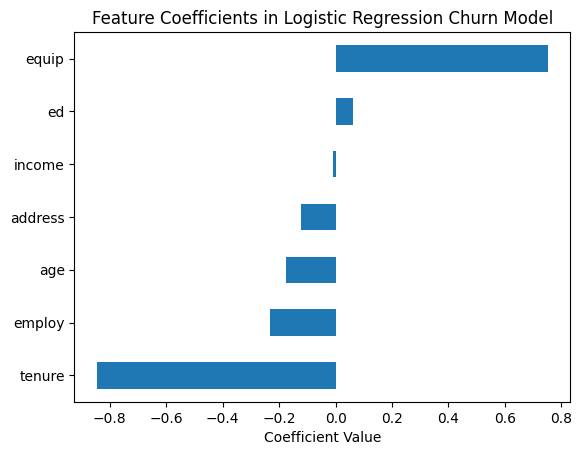

In [ ]:
# examining what role each input feature has to play
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

# Large coefficent = increase in this param will lead to a better chance of a positive (1) class
# Large negative valie = weaker affect of the change in the field on predicted class

In [10]:
# performance eval
log_loss(y_test, yhat_prob)


0.6257718410257236